In [1]:
import torch.nn as nn
import torchvision
from torchvision import transforms
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

# Task 1: Implement a Linear Autoencoder

### 1.1 Create Autoencoder

In [2]:
# Normalize dataset to the range [-1;1]
transform = transforms.transforms.Compose([
		transforms.Resize(size=(28, 28)),
		transforms.ToTensor(), # Range [0;1]
		transforms.Normalize(0.5, 0.5) # Mean and std = 0.5: [0;1] => [-1;1] since out = (x - mean) / std
])


# Load dataset 
dataset_train = torchvision.datasets.FashionMNIST('../data', download=True, train=True, transform=transform)
dataset_test = torchvision.datasets.FashionMNIST('../data', download=True, train=False, transform=transform)

C:\Users\adria\AppData\Local\Temp\ipykernel_12492\772462545.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Statistics:
Min value 0
Max value 255
Mean value 72.94035339355469
Shape (60000, 28, 28)
Data type torch.uint8


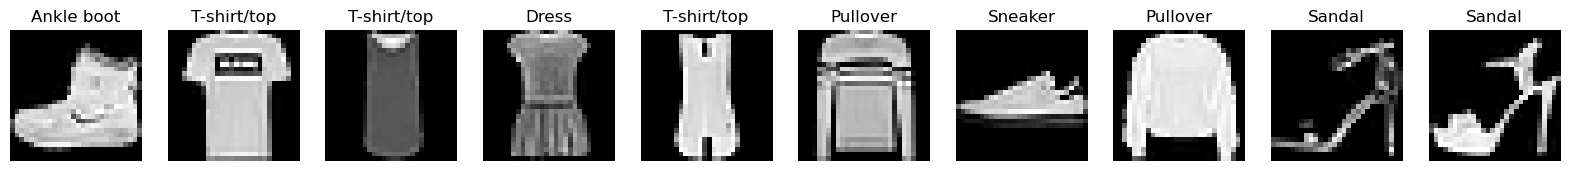

In [3]:
# Visualize some data
image_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
def plot_examples(data):
	# Plot some examples and put their corresponding label on top as title.
	fig, axs = plt.subplots(1,10, figsize=(20,10))
	for i in range(10):
		img = data.data[i]
		class_id = data.targets[i]
		axs[i].imshow(img,cmap='gray')
		axs[i].set_title(str(image_labels[class_id.item()]))
		axs[i].axis('off')
		
	fig.show()
	# Also print some statistics
	print('Statistics:')
	print('Min value',int(data.data.min()))
	print('Max value',int(data.data.max()))
	print('Mean value',float(data.data.float().mean()))
	print('Shape',tuple(data.data.shape))
	print('Data type',data.data.dtype)
	
plot_examples(dataset_train)

In [4]:
# Define Network
class Autoencoder(nn.Module):

	def __init__(self, input_shape=(28, 28)):
		super(Autoencoder, self).__init__()
		# Compress the feature space of 28*28 to an 8 dimensional latent space
		self.encoder = nn.Sequential(
			nn.Linear(in_features=28*28, out_features=128),
			nn.ReLU(),
			nn.Linear(in_features=128, out_features=64),
			nn.ReLU(),
			nn.Linear(in_features=64, out_features=32),
			nn.ReLU(),
			nn.Linear(in_features=32, out_features=16),
			nn.ReLU(),
			nn.Linear(in_features=16, out_features=8),
			nn.ReLU()
		)
		
		# Blow up the latent space to the original 28*28 feature space
		self.decoder = nn.Sequential(
			nn.Linear(in_features=8, out_features=8),
			nn.ReLU(),
			nn.Linear(in_features=8, out_features=32),
			nn.ReLU(),
			nn.Linear(in_features=32, out_features=64),
			nn.ReLU(),
			nn.Linear(in_features=64, out_features=128),
			nn.ReLU(),
			nn.Linear(in_features=128, out_features=784),
			nn.Tanh(),
		)

	def forward(self, x):
		# Flatten the 2 dimensional image
		x = torch.flatten(x, start_dim=1, end_dim=-1) # do not flatten batch size
		# Encode image to latent space
		x = self.encoder(x)

		# Reconstruct image
		x = self.decoder(x)

		return x



### 1.2 Implement reconstruction loss

In [5]:
criterion = nn.MSELoss()

### 1.3 Perform training + 1.4 Visualize results

Epoch: 0, Training loss: 0.2008
Test loss:  0.1281


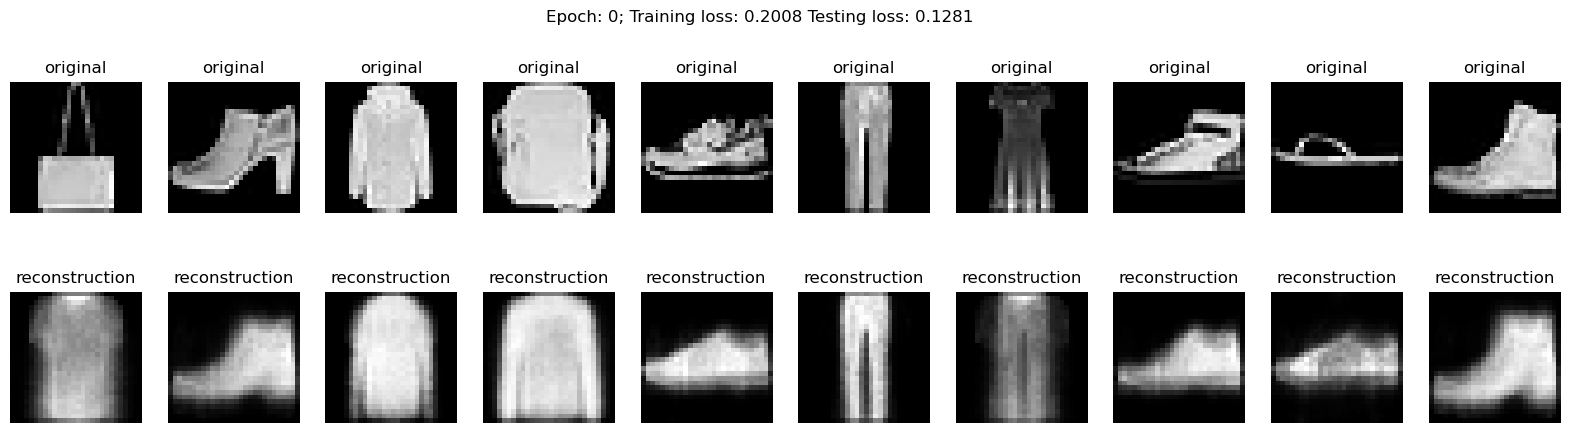

Epoch: 1, Training loss: 0.1192
Epoch: 2, Training loss: 0.108
Epoch: 3, Training loss: 0.1029
Epoch: 4, Training loss: 0.098
Epoch: 5, Training loss: 0.0923
Epoch: 6, Training loss: 0.0893
Epoch: 7, Training loss: 0.0869
Epoch: 8, Training loss: 0.0847
Epoch: 9, Training loss: 0.0819
Epoch: 10, Training loss: 0.0799
Test loss:  0.0794


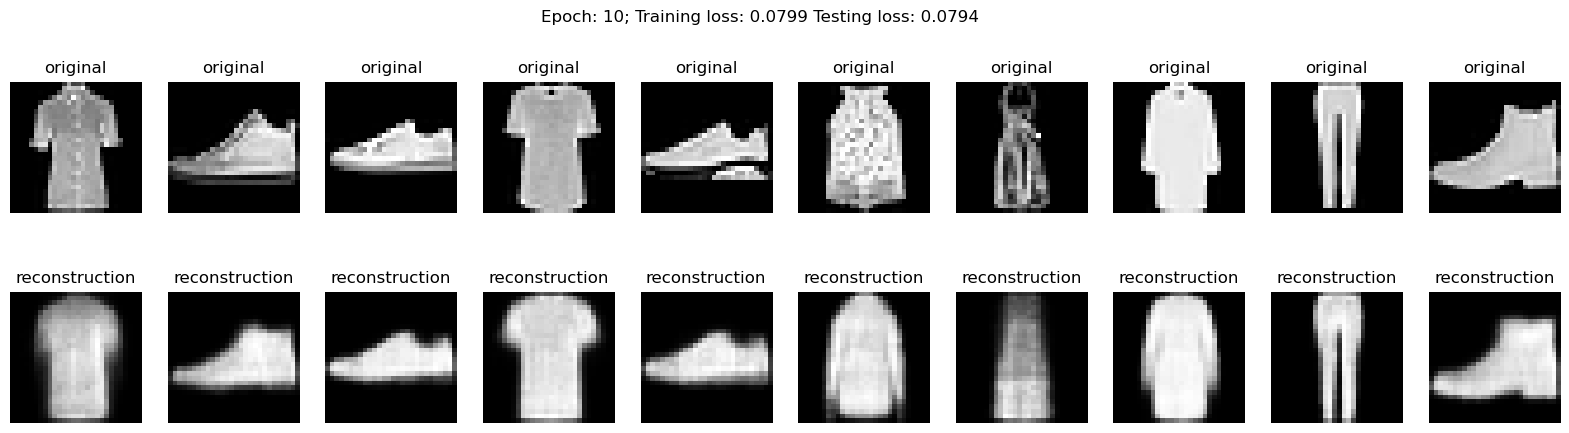

Epoch: 11, Training loss: 0.0788
Epoch: 12, Training loss: 0.0779
Epoch: 13, Training loss: 0.0773
Epoch: 14, Training loss: 0.0766
Epoch: 15, Training loss: 0.076
Epoch: 16, Training loss: 0.0755
Epoch: 17, Training loss: 0.075
Epoch: 18, Training loss: 0.0745
Epoch: 19, Training loss: 0.074
Epoch: 20, Training loss: 0.0737
Test loss:  0.0751


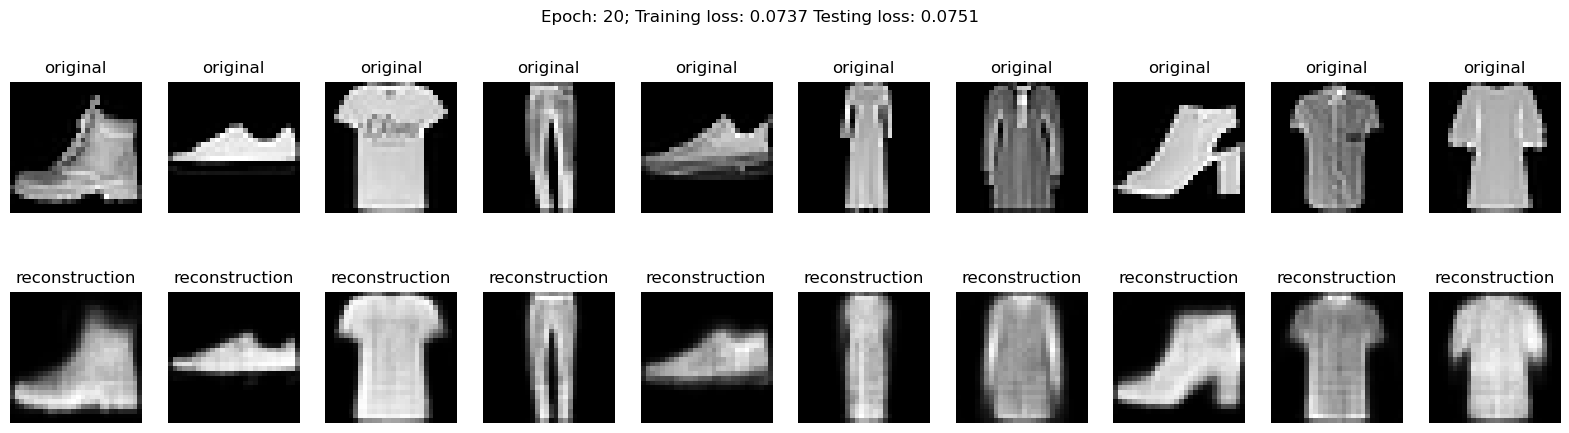

Epoch: 21, Training loss: 0.0734
Epoch: 22, Training loss: 0.0731
Epoch: 23, Training loss: 0.0728
Epoch: 24, Training loss: 0.0726
Epoch: 25, Training loss: 0.0723
Epoch: 26, Training loss: 0.0721
Epoch: 27, Training loss: 0.0719
Epoch: 28, Training loss: 0.0717
Epoch: 29, Training loss: 0.0716
Epoch: 30, Training loss: 0.0714
Test loss:  0.0724


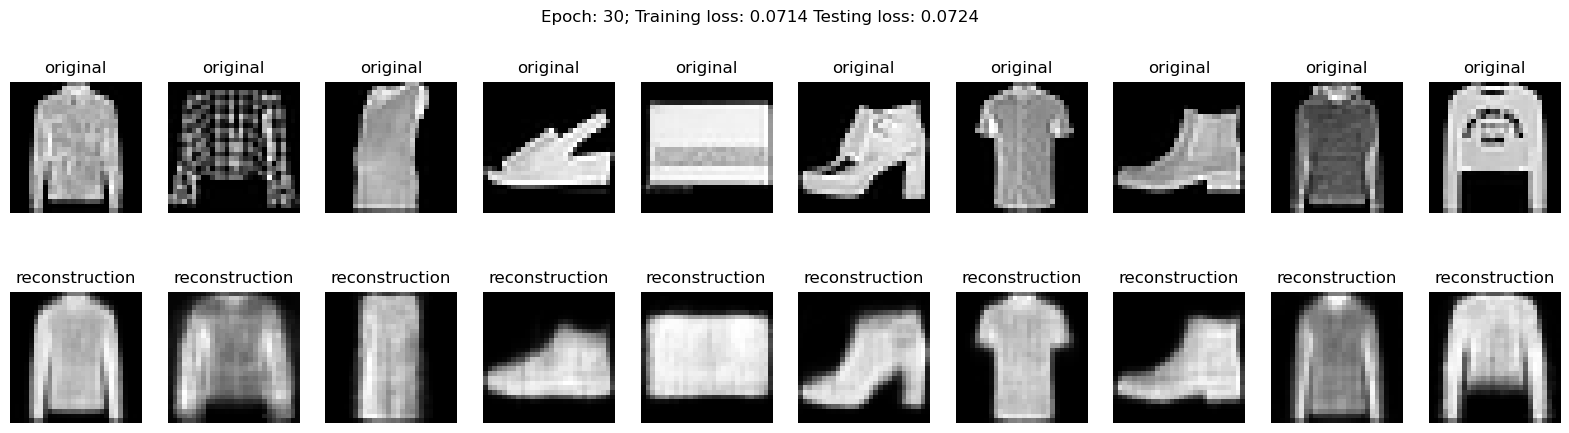

Epoch: 31, Training loss: 0.0712
Epoch: 32, Training loss: 0.071
Epoch: 33, Training loss: 0.0709
Epoch: 34, Training loss: 0.0707
Epoch: 35, Training loss: 0.0706
Epoch: 36, Training loss: 0.0705
Epoch: 37, Training loss: 0.0704
Epoch: 38, Training loss: 0.0703
Epoch: 39, Training loss: 0.0701
Epoch: 40, Training loss: 0.0699
Test loss:  0.0706


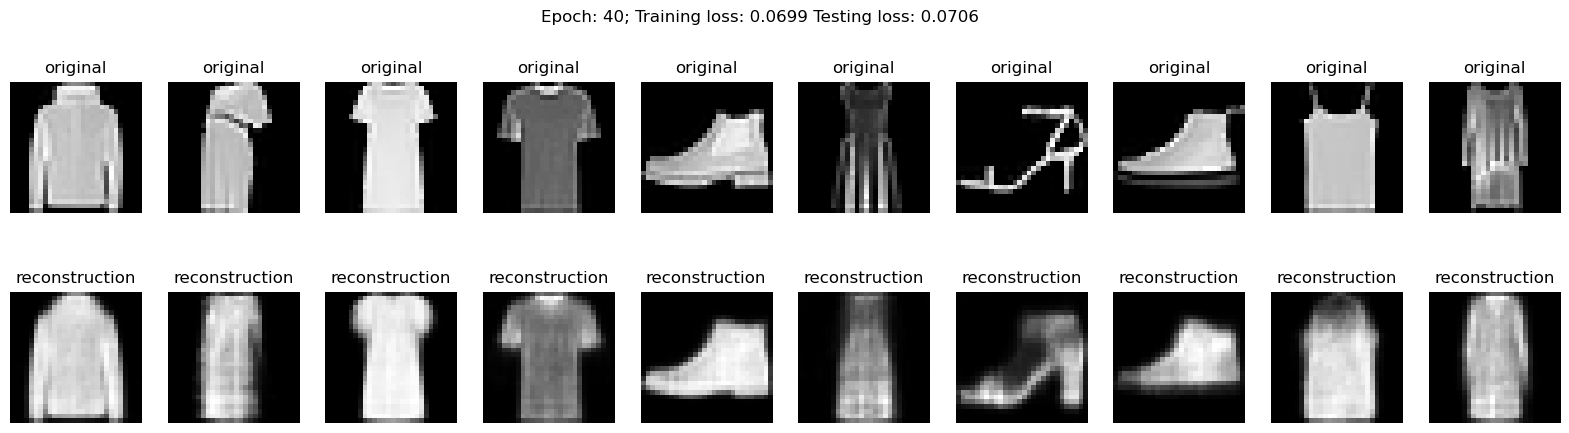

Epoch: 41, Training loss: 0.0699
Epoch: 42, Training loss: 0.0698
Epoch: 43, Training loss: 0.0696
Epoch: 44, Training loss: 0.0696
Epoch: 45, Training loss: 0.0695
Epoch: 46, Training loss: 0.0694
Epoch: 47, Training loss: 0.0693
Epoch: 48, Training loss: 0.0692
Epoch: 49, Training loss: 0.0691
Epoch: 50, Training loss: 0.069
Test loss:  0.07


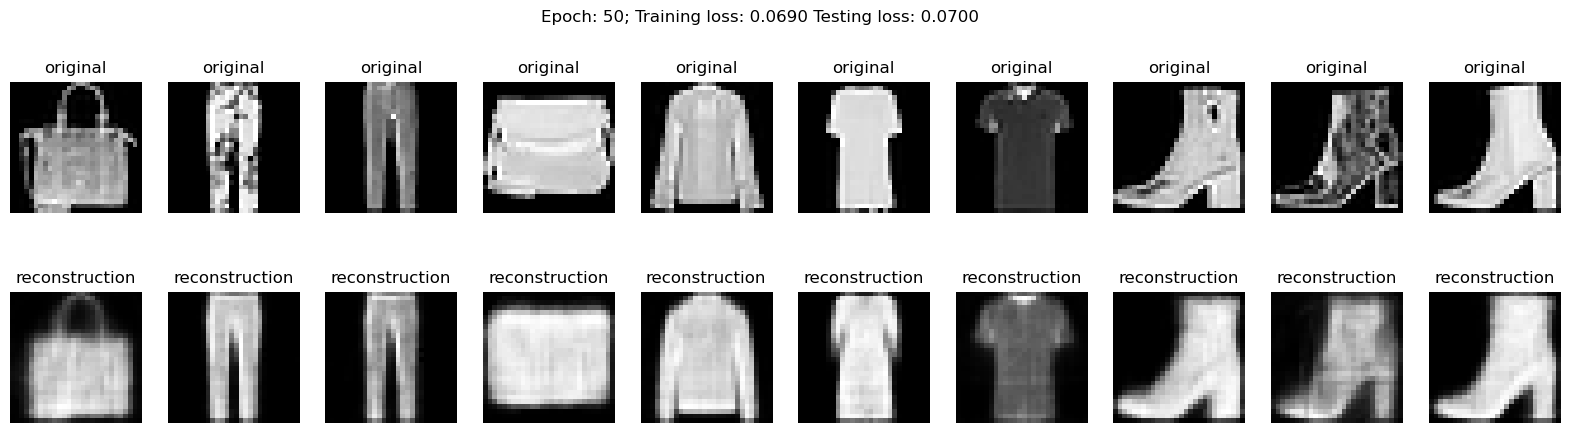

In [6]:
# Hyperparameter
lr = 0.001
weight_decay = 1e-5
batch_size = 128
epochs = 51

# Select the device to work on.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


model = Autoencoder().to(device)
optimizer = torch.optim.Adam(params=model.parameters(), lr=lr, weight_decay=weight_decay)

# Initialize dataloader
dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True, drop_last=True) # Drop last, to drop last batch since it is smaller than 128
dataloader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=True, drop_last=True)

total_loss_train = np.zeros(epochs)
total_loss_test = np.zeros(epochs)
# Perform training
for epoch in range(epochs):
	loss_train = 0
	model.train()
	for [example, _] in dataloader_train:
		example = example.to(device)

		optimizer.zero_grad()
		#print(example.shape)
		prediction = model(example)
		prediction = torch.reshape(prediction, shape=(128, 1, 28, 28)) # Reconstruct original image dimension
		loss = criterion(prediction, example)

		loss_train += loss

		loss.backward()

		optimizer.step()
	
	loss_train = loss_train / len(dataloader_train)
	total_loss_train[epoch] = loss_train
	print(f"Epoch: {epoch}, Training loss: {round(loss_train.item(), 4)}")


	# Every 10 epochs, also calculate the loss on the test set
	if epoch % 10 == 0:
		loss_test = 0

		examples_test = []
		predictions_test = []

		model.eval()
		with torch.no_grad():
			for [example, _] in dataloader_test:
				example = example.to(device)

				prediction = model(example)
				prediction = torch.reshape(prediction, shape=(128, 1, 28, 28)) # Reconstruct original image dimension
				loss = criterion(prediction, example)

				loss_test += loss
				examples_test.append(example)
				predictions_test.append(prediction)
			loss_test = loss_test / len(dataloader_test)
			total_loss_test[epoch] = loss_test
			print("Test loss: ", round(loss_test.item(), 4))


			fig, axs = plt.subplots(2, 10, figsize=(20, 5))

			# Draw 10 random image indices
			random_nmbrs = np.random.choice(range(len(predictions_test)), size=10)

			for i in range(10):
				example_image = examples_test[i].cpu().detach()[0][0]
				prediction_image = predictions_test[i].cpu().detach()[0][0]
				fig.suptitle(f'Epoch: {epoch}; Training loss: {loss_train:.4f} Testing loss: {loss_test:.4f}')
				axs[0][i].imshow(example_image, cmap='gray')
				axs[0][i].set_title("original")
				axs[0][i].axis('off')
				axs[1][i].imshow(prediction_image, cmap='gray')
				axs[1][i].set_title("reconstruction")
				axs[1][i].axis('off')
			plt.show()





In [7]:
# Save the trained model to be used later
torch.save(model.state_dict(), 'autoencoder_{}.ckpt'.format(epoch))

# Task 2: Denoising autoencoder

In [9]:
def add_white_noise(x, factor=0.5, stddev=1):
	""" Adds white noise to an input tensor.
	To make sure that data is in intended range [min, max], use torch.clamp(x, min, max) after applying this function.

	:param x: ND Tensor that is altered
	:param factor: A factor that controls the strength of the additive noise
	:param stddev: The stddev of the normal distribution used for generating the noise
	:return: ND Tensor, x with white noise
	"""
	# add white noise to tensor
	noise = x.clone().normal_(0, stddev)
	return x + noise * factor

Epoch: 0, Training loss: 0.217
Test loss:  0.1408


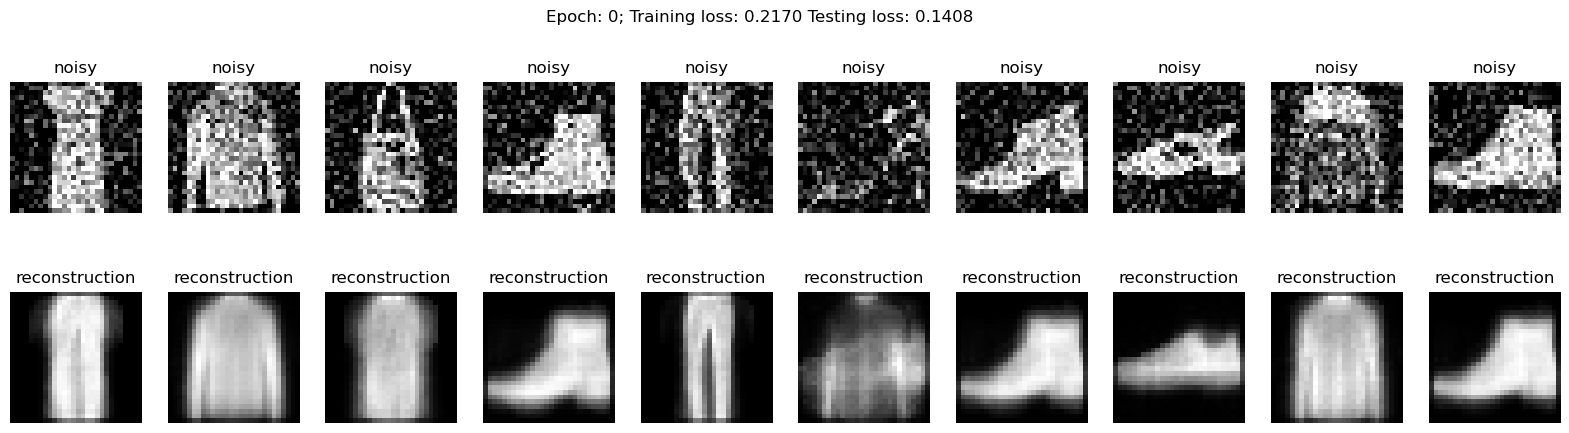

Epoch: 1, Training loss: 0.1219
Epoch: 2, Training loss: 0.1051
Epoch: 3, Training loss: 0.0976
Epoch: 4, Training loss: 0.0944
Epoch: 5, Training loss: 0.0919
Epoch: 6, Training loss: 0.0899
Epoch: 7, Training loss: 0.0884
Epoch: 8, Training loss: 0.0872
Epoch: 9, Training loss: 0.0863
Epoch: 10, Training loss: 0.0855
Test loss:  0.0855


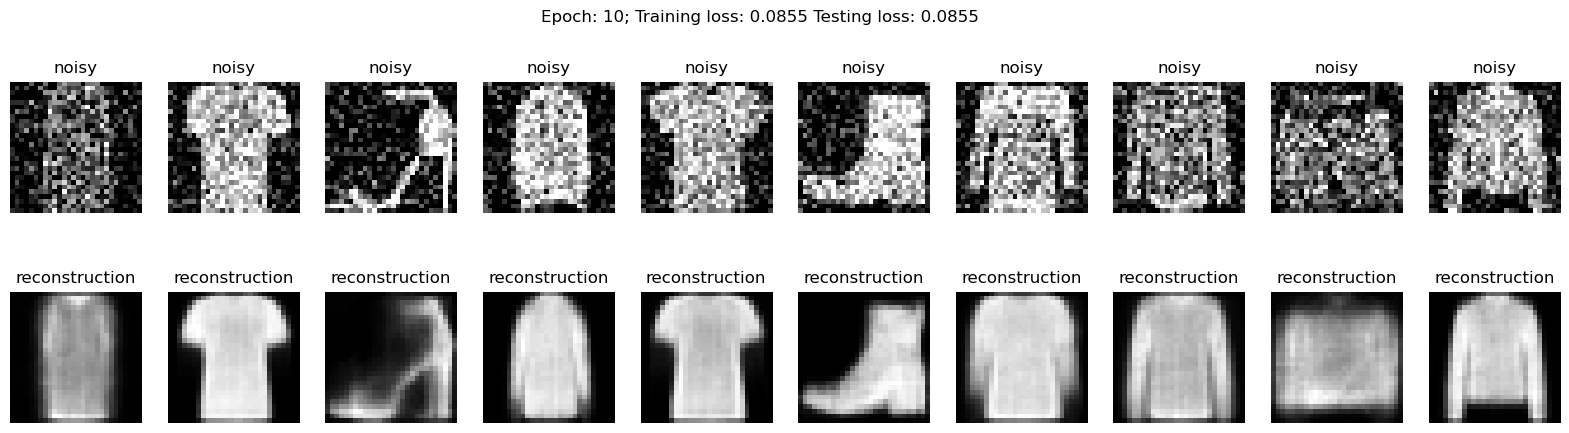

Epoch: 11, Training loss: 0.0848
Epoch: 12, Training loss: 0.0842
Epoch: 13, Training loss: 0.0837
Epoch: 14, Training loss: 0.0834
Epoch: 15, Training loss: 0.0829
Epoch: 16, Training loss: 0.0825
Epoch: 17, Training loss: 0.0823
Epoch: 18, Training loss: 0.0819
Epoch: 19, Training loss: 0.0816
Epoch: 20, Training loss: 0.0814
Test loss:  0.0814


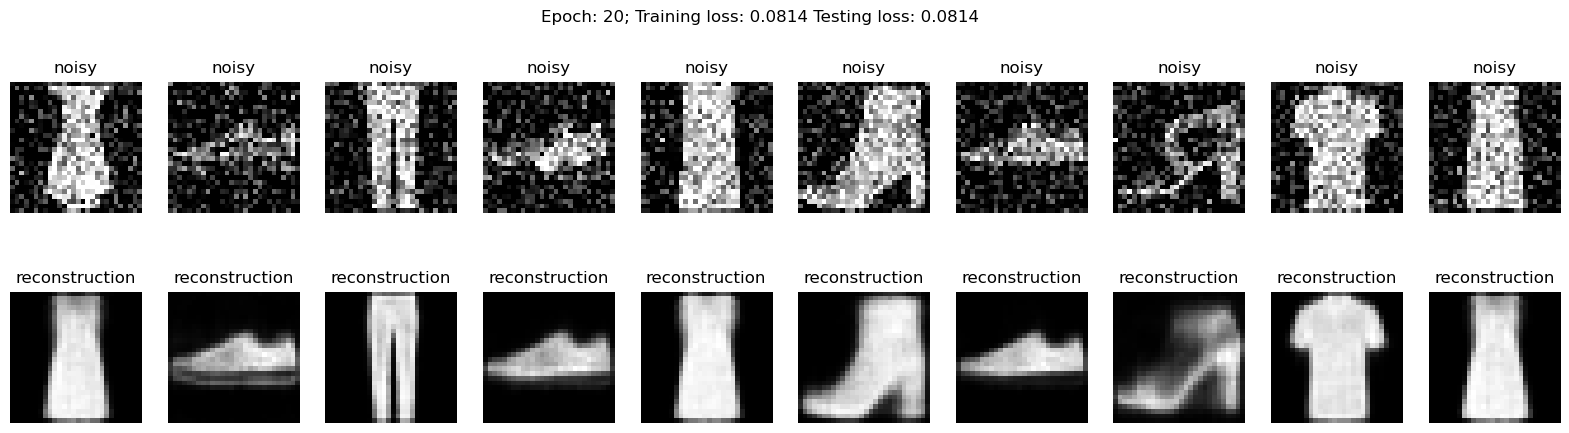

Epoch: 21, Training loss: 0.081
Epoch: 22, Training loss: 0.0809
Epoch: 23, Training loss: 0.0807
Epoch: 24, Training loss: 0.0804
Epoch: 25, Training loss: 0.0803
Epoch: 26, Training loss: 0.0801
Epoch: 27, Training loss: 0.0799
Epoch: 28, Training loss: 0.0797
Epoch: 29, Training loss: 0.0795
Epoch: 30, Training loss: 0.0794
Test loss:  0.0804


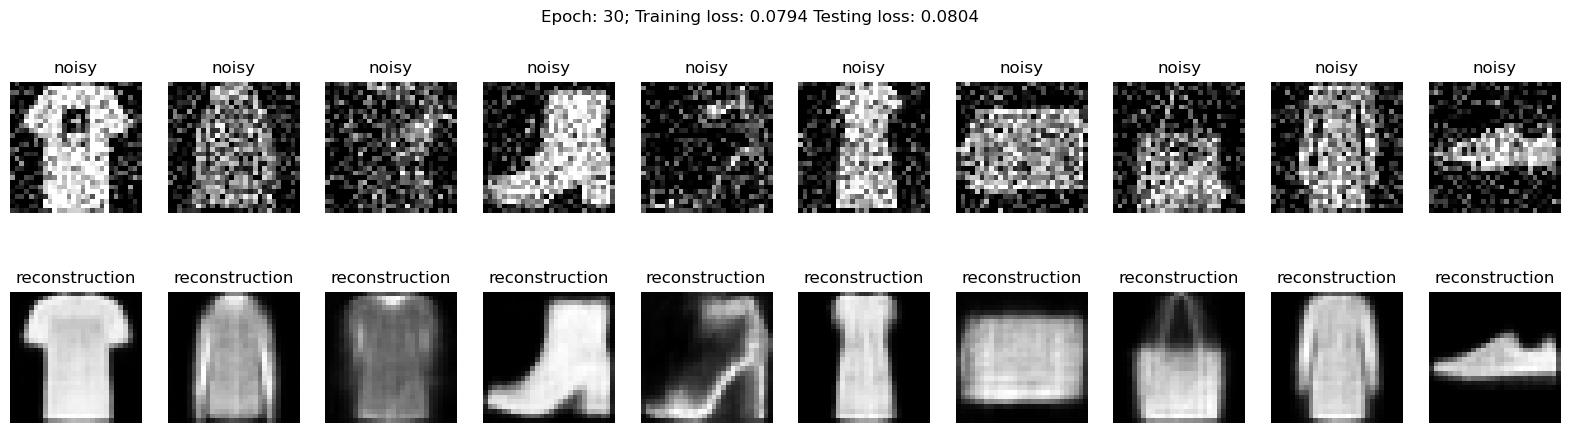

Epoch: 31, Training loss: 0.0792
Epoch: 32, Training loss: 0.0792
Epoch: 33, Training loss: 0.079
Epoch: 34, Training loss: 0.0788
Epoch: 35, Training loss: 0.0787
Epoch: 36, Training loss: 0.0786
Epoch: 37, Training loss: 0.0783
Epoch: 38, Training loss: 0.0783
Epoch: 39, Training loss: 0.0781
Epoch: 40, Training loss: 0.0781
Test loss:  0.0791


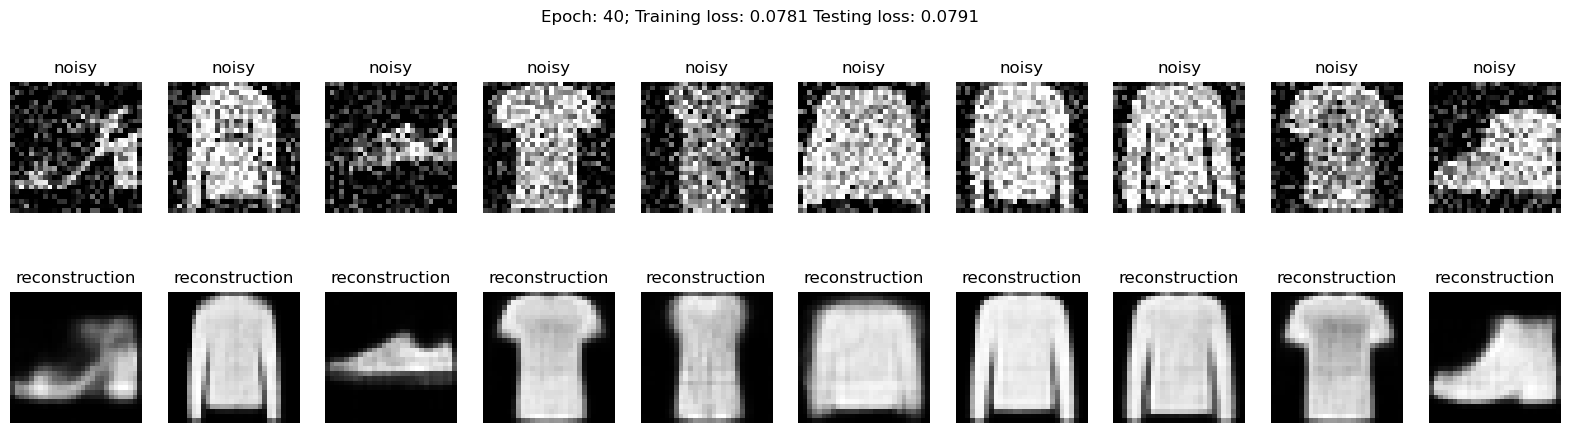

Epoch: 41, Training loss: 0.0779
Epoch: 42, Training loss: 0.0779
Epoch: 43, Training loss: 0.0778
Epoch: 44, Training loss: 0.0776
Epoch: 45, Training loss: 0.0775
Epoch: 46, Training loss: 0.0774
Epoch: 47, Training loss: 0.0773
Epoch: 48, Training loss: 0.0773
Epoch: 49, Training loss: 0.0772
Epoch: 50, Training loss: 0.0771
Test loss:  0.0777


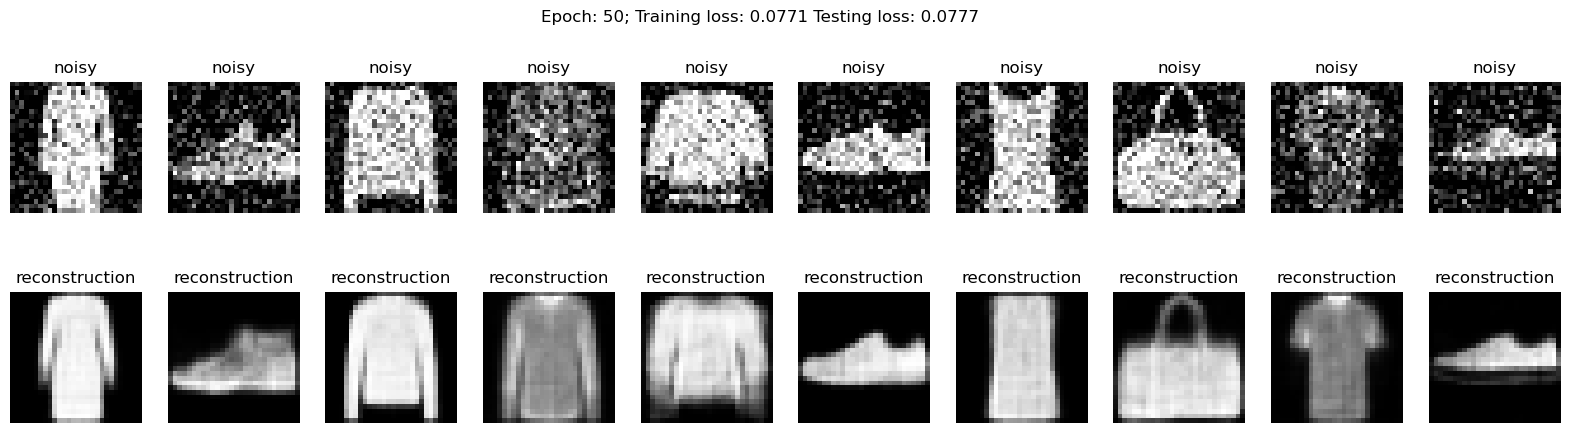

In [11]:
model = Autoencoder().to(device)
optimizer = torch.optim.Adam(params=model.parameters(), lr=lr, weight_decay=weight_decay)

# Initialize dataloader
# Drop last, to drop last batch since it is smaller than 128
dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True, drop_last=True) 
dataloader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=True, drop_last=True)

total_loss_train = np.zeros(epochs)
total_loss_test = np.zeros(epochs)
# Perform training
for epoch in range(epochs):
	loss_train = 0
	model.train()
	for [example, _] in dataloader_train:
		example = example.to(device)

		example_noisy = add_white_noise(example)
		example_noisy = torch.clamp(example_noisy, min=-1, max=1)

		optimizer.zero_grad()
		prediction = model(example_noisy)
		prediction = torch.reshape(prediction, shape=(128, 1, 28, 28)) # Reconstruct original image dimension
		loss = criterion(prediction, example)

		loss_train += loss

		loss.backward()

		optimizer.step()
	
	loss_train = loss_train / len(dataloader_train)
	total_loss_train[epoch] = loss_train
	print(f"Epoch: {epoch}, Training loss: {round(loss_train.item(), 4)}")


	# Every 10 epochs, also calculate the loss on the test set
	if epoch % 10 == 0:
		loss_test = 0

		examples_test = []
		predictions_test = []

		model.eval()
		with torch.no_grad():
			for [example, _] in dataloader_test:
				example = example.to(device)

				example_noisy = add_white_noise(example)
				example_noisy = torch.clamp(example_noisy, min=-1, max=1)

				prediction = model(example_noisy)
				prediction = torch.reshape(prediction, shape=(128, 1, 28, 28)) # Reconstruct original image dimension
				loss = criterion(prediction, example)

				loss_test += loss
				examples_test.append(example_noisy)
				predictions_test.append(prediction)
			loss_test = loss_test / len(dataloader_test)
			total_loss_test[epoch] = loss_test
			print("Test loss: ", round(loss_test.item(), 4))


			fig, axs = plt.subplots(2, 10, figsize=(20, 5))

			random_nmbrs = np.random.choice(range(len(predictions_test)), size=10)

			# I decided to visualize the noisy image here, as it will show the effect of the noisy autoencoder
			for i in range(10):
				example_image = examples_test[i].cpu().detach()[0][0]
				prediction_image = predictions_test[i].cpu().detach()[0][0]
				fig.suptitle(f'Epoch: {epoch}; Training loss: {loss_train:.4f} Testing loss: {loss_test:.4f}')
				axs[0][i].imshow(example_image, cmap='gray')
				axs[0][i].set_title("noisy")
				axs[0][i].axis('off')
				axs[1][i].imshow(prediction_image, cmap='gray')
				axs[1][i].set_title("reconstruction")
				axs[1][i].axis('off')
			plt.show()

**Autoencoder**
Training loss: 0.0690
Testing loss: 0.0700

**Noisy Autoencoder**
Training loss: 0.0771
Testing loss: 0.0777

Both the Training loss and Testing loss are higher when using noisy inputs. This makes sense, since the noise makes it more difficult to reconstruct the original image

In [12]:
# Save the trained model to be used later
torch.save(model.state_dict(), 'autoencoder_noisy_{}.ckpt'.format(epoch))

# Task 3: Implement a Convolutional Autoencoder

In [13]:
# Define network architecture
class Conv_Autoencoder(nn.Module):
	def __init__(self):
		super(Conv_Autoencoder,self).__init__()
		# Encoder
		self.encoder = nn.Sequential(
			 nn.Conv2d(in_channels=1, out_channels=4, kernel_size=5), # 5 x 24 x 24
			 nn.ReLU(),
			 nn.Conv2d(in_channels=4, out_channels=8, kernel_size=5), # 8 x 20 x 20
			 nn.ReLU(),
			 nn.Flatten(), # 1 x 3200
			 nn.Linear(in_features=3200, out_features=10),
			 nn.Softmax()
			)
		
		# Decoder
		self.decoder = nn.Sequential(
			 nn.Linear(in_features=10, out_features=400),
			 nn.ReLU(),
			 nn.Linear(in_features=400, out_features=4000),
			 nn.ReLU(),
			 nn.Unflatten(dim=1, unflattened_size=(10, 20, 20)),
			 nn.ConvTranspose2d(in_channels=10, out_channels=10, kernel_size=5),
			 nn.ReLU(),
			 nn.ConvTranspose2d(in_channels=10, out_channels=1, kernel_size=5),
			 nn.Tanh()
			)
		
	def forward(self, x):
		x = x.view(-1, 1, 28, 28)
		x = self.encoder(x)

		x = self.decoder(x)
		x = x.view(-1, 28*28)
		return x
	
	def generate_image(self, x):
		x = self.decoder(x)
		x = x.view(-1, 28*28)
		return x

### 3.2 Implement reconstruction loss

In [14]:
criterion = nn.MSELoss()

### 3.3 Perform training + 1.4 Visualize results

c:\Users\adria\anaconda3\envs\genai\Lib\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch: 0, Training loss: 0.1604
Test loss:  0.0932


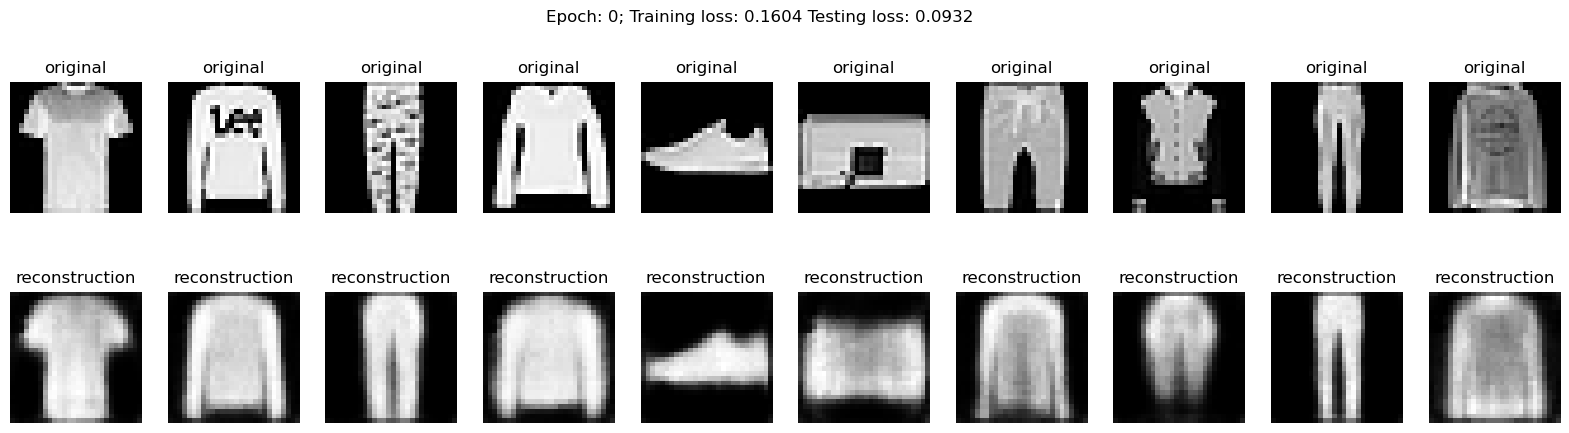

Epoch: 1, Training loss: 0.084
Epoch: 2, Training loss: 0.0751
Epoch: 3, Training loss: 0.0709
Epoch: 4, Training loss: 0.068
Epoch: 5, Training loss: 0.0659
Epoch: 6, Training loss: 0.064
Epoch: 7, Training loss: 0.0627
Epoch: 8, Training loss: 0.0615
Epoch: 9, Training loss: 0.0604
Epoch: 10, Training loss: 0.0595
Test loss:  0.0594


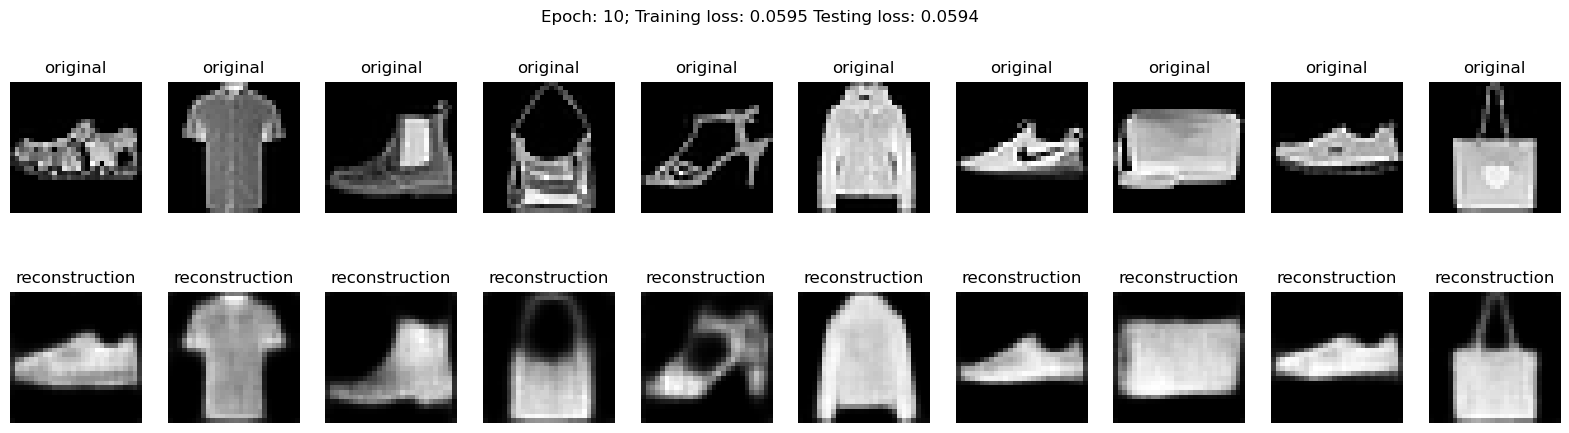

Epoch: 11, Training loss: 0.0588
Epoch: 12, Training loss: 0.058
Epoch: 13, Training loss: 0.0573
Epoch: 14, Training loss: 0.0567
Epoch: 15, Training loss: 0.0563
Epoch: 16, Training loss: 0.0558
Epoch: 17, Training loss: 0.0554
Epoch: 18, Training loss: 0.0549
Epoch: 19, Training loss: 0.0546
Epoch: 20, Training loss: 0.0542
Test loss:  0.0547


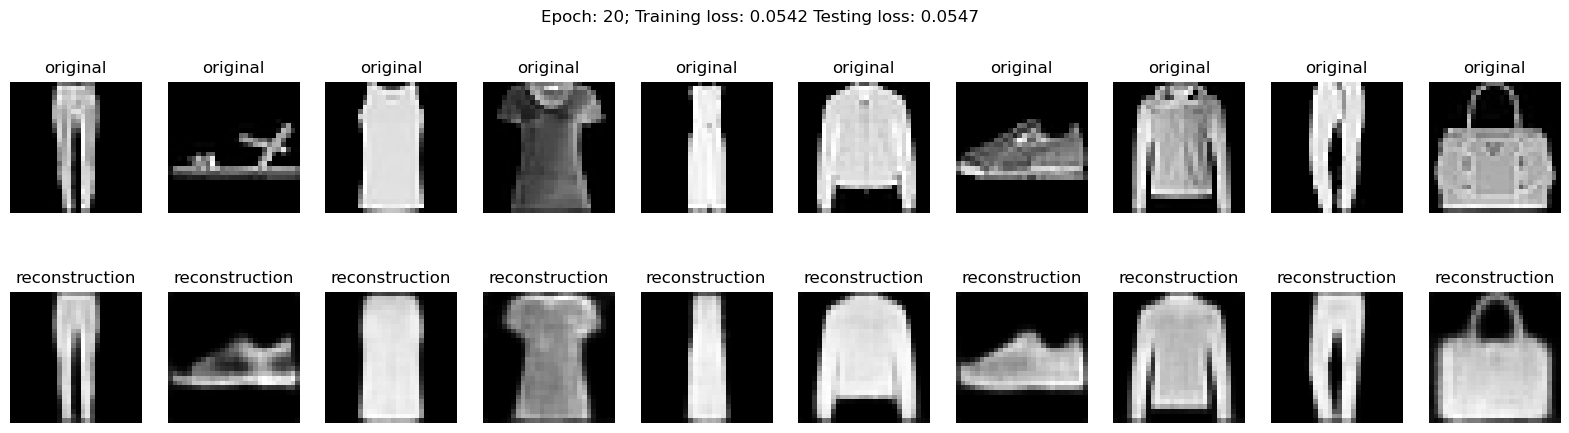

Epoch: 21, Training loss: 0.0539
Epoch: 22, Training loss: 0.0536
Epoch: 23, Training loss: 0.0534
Epoch: 24, Training loss: 0.0532
Epoch: 25, Training loss: 0.0529
Epoch: 26, Training loss: 0.0528
Epoch: 27, Training loss: 0.0525
Epoch: 28, Training loss: 0.0525
Epoch: 29, Training loss: 0.0521
Epoch: 30, Training loss: 0.0521
Test loss:  0.0532


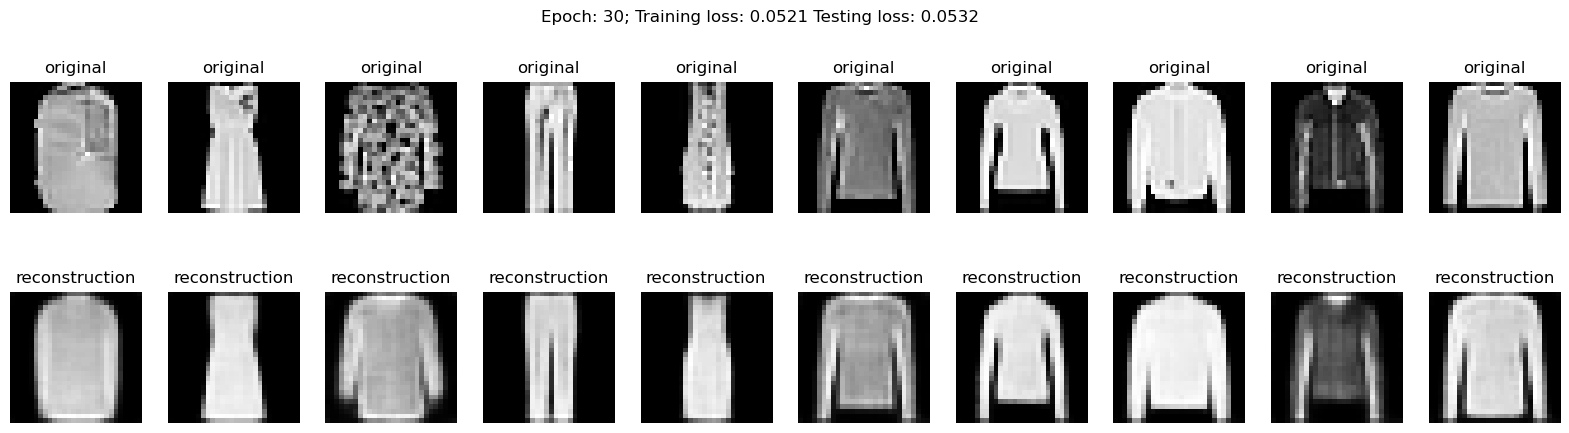

Epoch: 31, Training loss: 0.052
Epoch: 32, Training loss: 0.0516
Epoch: 33, Training loss: 0.0517
Epoch: 34, Training loss: 0.0515
Epoch: 35, Training loss: 0.0514
Epoch: 36, Training loss: 0.0513
Epoch: 37, Training loss: 0.0513
Epoch: 38, Training loss: 0.0512
Epoch: 39, Training loss: 0.0509
Epoch: 40, Training loss: 0.051
Test loss:  0.0523


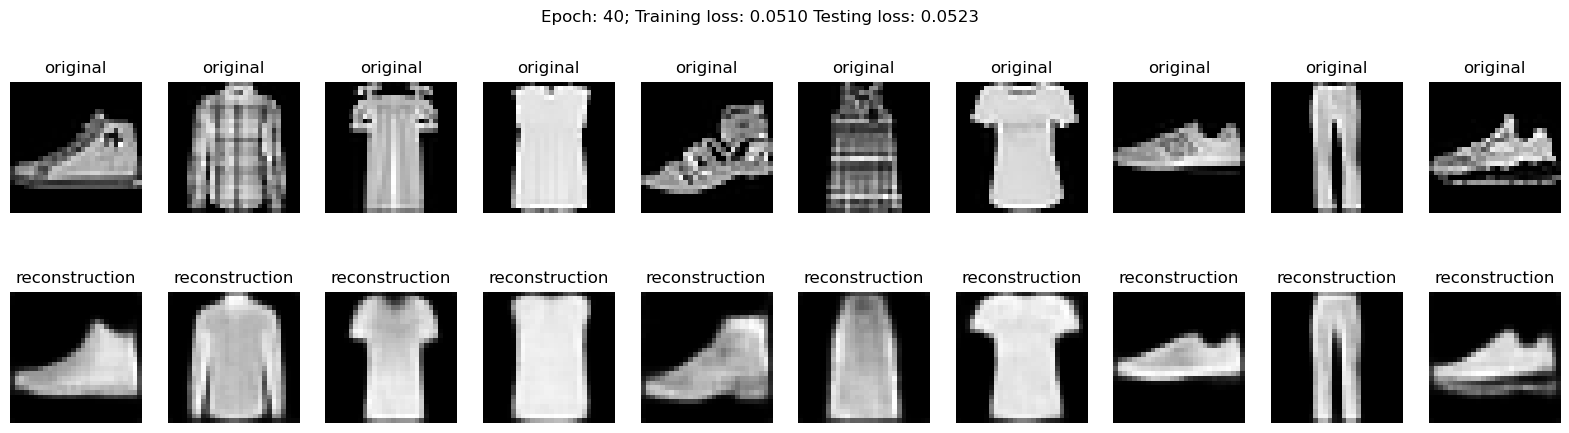

Epoch: 41, Training loss: 0.0509
Epoch: 42, Training loss: 0.0508
Epoch: 43, Training loss: 0.0507
Epoch: 44, Training loss: 0.0506
Epoch: 45, Training loss: 0.0506
Epoch: 46, Training loss: 0.0506
Epoch: 47, Training loss: 0.0504
Epoch: 48, Training loss: 0.0504
Epoch: 49, Training loss: 0.0504
Epoch: 50, Training loss: 0.0503
Test loss:  0.0511


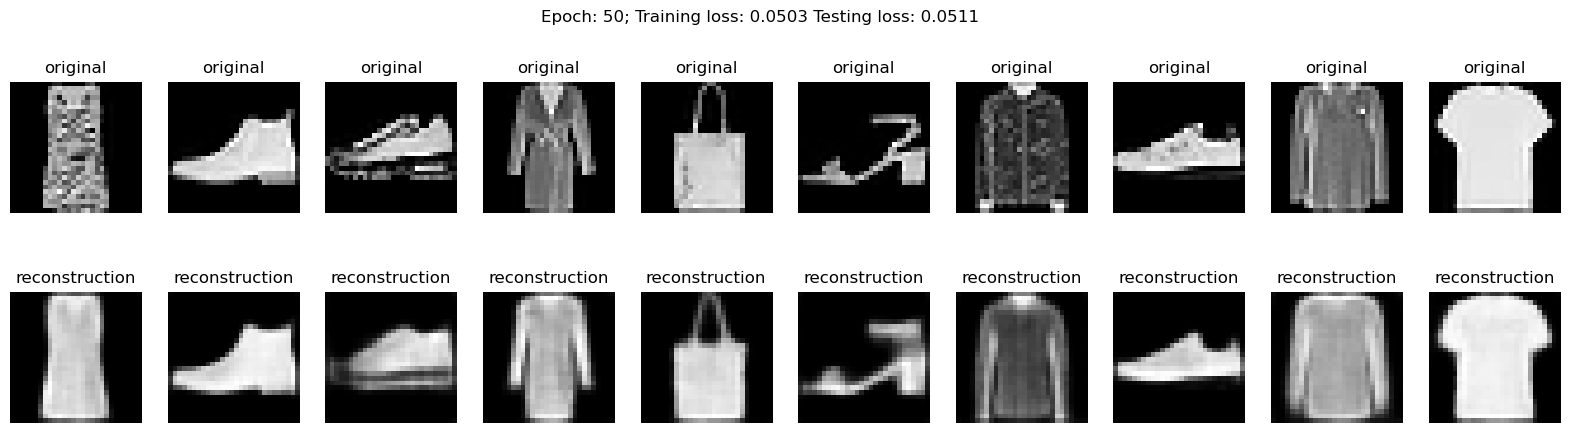

In [16]:
# Hyperparameter
lr = 0.001
weight_decay = 1e-5
batch_size = 128
epochs = 51

# Select the device to work on.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


model = Conv_Autoencoder().to(device)
optimizer = torch.optim.Adam(params=model.parameters(), lr=lr, weight_decay=weight_decay)

# Initialize dataloader
dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True, drop_last=True) # Drop last, to drop last batch since it is smaller than 128
dataloader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=True, drop_last=True)

total_loss_train = np.zeros(epochs)
total_loss_test = np.zeros(epochs)
# Perform training
for epoch in range(epochs):
	loss_train = 0
	model.train()
	for [example, _] in dataloader_train:
		example = example.to(device)

		optimizer.zero_grad()
		prediction = model(example)
		prediction = torch.reshape(prediction, shape=(128, 1, 28, 28)) # Reconstruct original image dimension
		loss = criterion(prediction, example)

		loss_train += loss

		loss.backward()

		optimizer.step()
	
	loss_train = loss_train / len(dataloader_train)
	total_loss_train[epoch] = loss_train
	print(f"Epoch: {epoch}, Training loss: {round(loss_train.item(), 4)}")


	# Every 10 epochs, also calculate the loss on the test set
	if epoch % 10 == 0:
		loss_test = 0

		examples_test = []
		predictions_test = []

		model.eval()
		with torch.no_grad():
			for [example, _] in dataloader_test:
				example = example.to(device)

				prediction = model(example)
				prediction = torch.reshape(prediction, shape=(128, 1, 28, 28)) # Reconstruct original image dimension
				loss = criterion(prediction, example)

				loss_test += loss
				examples_test.append(example)
				predictions_test.append(prediction)
			loss_test = loss_test / len(dataloader_test)
			total_loss_test[epoch] = loss_test
			print("Test loss: ", round(loss_test.item(), 4))


			fig, axs = plt.subplots(2, 10, figsize=(20, 5))

			random_nmbrs = np.random.choice(range(len(predictions_test)), size=10)

			for i in range(10):
				example_image = examples_test[i].cpu().detach()[0][0]
				prediction_image = predictions_test[i].cpu().detach()[0][0]
				fig.suptitle(f'Epoch: {epoch}; Training loss: {loss_train:.4f} Testing loss: {loss_test:.4f}')
				axs[0][i].imshow(example_image, cmap='gray')
				axs[0][i].set_title("original")
				axs[0][i].axis('off')
				axs[1][i].imshow(prediction_image, cmap='gray')
				axs[1][i].set_title("reconstruction")
				axs[1][i].axis('off')
			plt.show()





In [17]:
# Save the trained model to be used later
torch.save(model.state_dict(), 'autoencoder_conv_{}.ckpt'.format(epoch))

### 3.5 Model comparison
**Linear model:**
- Training loss:  0.0675
- Test loss:  0.0688

**Convolutional model:**
- Training loss:  0.0487
- Test loss:  0.0497

As shown above, both the training loss as well as the test loss are lower for the convolutional model when run with the same hyperparameters. This clearly shows, that the convolutional model is the better model in this case. That makes sense, since convolutional layers work well with image data, since they can detect shapes in local regions. 

torch.Size([28, 28])


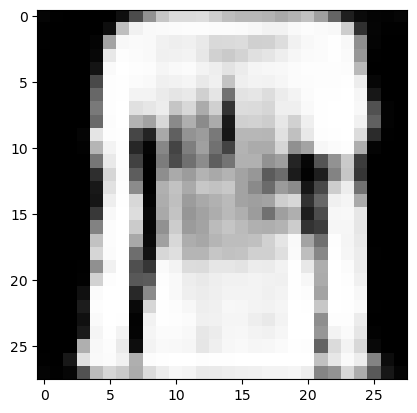

In [29]:
# Try out if I can generate an image from arbitrary values. Doesn't really work, since we do not know the data distribution in the latent space
rand_x = torch.rand(1,10).to(device)

image = model.generate_image(rand_x)
image = torch.reshape(image, (28, 28))
print(image.shape)
plt.imshow(image.cpu().detach(), cmap='gray')